Data Preprocessing

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/gold_standard_generation'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
significant_genes_report_corrected.csv	TCGA_dataset


In [2]:
!pip install sparse_lmm

In [3]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA_dataset/TCGA_Mesothelioma_(MESO)/TCGA.MESO.sampleMap_MESO_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA_dataset/TCGA_Mesothelioma_(MESO)/TCGA.MESO.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [4]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,asbestos_exposure_age,asbestos_exposure_age_last,...,_GENOMIC_ID_TCGA_MESO_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_MESO_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_MESO_RPPA,_GENOMIC_ID_TCGA_MESO_gistic2,_GENOMIC_ID_TCGA_MESO_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_MESO_miRNA_HiSeq,_GENOMIC_ID_TCGA_MESO_exp_HiSeqV2,_GENOMIC_ID_TCGA_MESO_PDMRNAseqCNV,_GENOMIC_ID_TCGA_MESO_gistic2thd,_GENOMIC_ID_TCGA_MESO_hMethyl450
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3H-AB3K-01,TCGA-3H-AB3K-01,TCGA-3H-AB3K,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,64,NaN,NaN,...,TCGA-3H-AB3K-01A-11D-A39R-32,919d8bde-c3b7-4cd9-8463-938afdb89ad7,FA2214BC-2F60-4767-BB8F-09679A9C0BD5,TCGA-3H-AB3K-01A-11D-A39Q-01,919d8bde-c3b7-4cd9-8463-938afdb89ad7,TCGA-3H-AB3K-01,919d8bde-c3b7-4cd9-8463-938afdb89ad7,TCGA-3H-AB3K-01,TCGA-3H-AB3K-01A-11D-A39Q-01,TCGA-3H-AB3K-01A-11D-A39S-05
TCGA-3H-AB3L-01,TCGA-3H-AB3L-01,TCGA-3H-AB3L,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,60,NaN,NaN,...,TCGA-3H-AB3L-01A-11D-A39R-32,3baf5546-99d9-417b-97bb-e00dda7ebcdd,81F9016D-1F8D-4902-AA68-2002130CF41F,TCGA-3H-AB3L-01A-11D-A39Q-01,3baf5546-99d9-417b-97bb-e00dda7ebcdd,TCGA-3H-AB3L-01,3baf5546-99d9-417b-97bb-e00dda7ebcdd,TCGA-3H-AB3L-01,TCGA-3H-AB3L-01A-11D-A39Q-01,TCGA-3H-AB3L-01A-11D-A39S-05
TCGA-3H-AB3M-01,TCGA-3H-AB3M-01,TCGA-3H-AB3M,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,53,NaN,NaN,...,TCGA-3H-AB3M-01A-11D-A39R-32,f0b52bcf-d7b4-4daa-82bb-e13e2d753be9,F98B8A5F-23ED-477D-833E-71730A4BE6B9,TCGA-3H-AB3M-01A-11D-A39Q-01,f0b52bcf-d7b4-4daa-82bb-e13e2d753be9,TCGA-3H-AB3M-01,f0b52bcf-d7b4-4daa-82bb-e13e2d753be9,TCGA-3H-AB3M-01,TCGA-3H-AB3M-01A-11D-A39Q-01,TCGA-3H-AB3M-01A-11D-A39S-05
TCGA-3H-AB3O-01,TCGA-3H-AB3O-01,TCGA-3H-AB3O,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,58,25.0,31.0,...,TCGA-3H-AB3O-01A-11D-A39R-32,de645724-4408-4771-9814-cdeffec79758,3B2C605A-9789-400E-B1B5-A8CEDA10E484,TCGA-3H-AB3O-01A-11D-A39Q-01,de645724-4408-4771-9814-cdeffec79758,TCGA-3H-AB3O-01,de645724-4408-4771-9814-cdeffec79758,TCGA-3H-AB3O-01,TCGA-3H-AB3O-01A-11D-A39Q-01,TCGA-3H-AB3O-01A-11D-A39S-05
TCGA-3H-AB3S-01,TCGA-3H-AB3S-01,TCGA-3H-AB3S,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,69,NaN,NaN,...,TCGA-3H-AB3S-01A-21D-A39R-32,34787f03-da7e-4f3e-b33f-73b1bf51fb74,BF706147-4C7D-4C10-B27A-C4851B1B4DFA,TCGA-3H-AB3S-01A-21D-A39Q-01,34787f03-da7e-4f3e-b33f-73b1bf51fb74,TCGA-3H-AB3S-01,34787f03-da7e-4f3e-b33f-73b1bf51fb74,TCGA-3H-AB3S-01,TCGA-3H-AB3S-01A-21D-A39Q-01,TCGA-3H-AB3S-01A-21D-A39S-05


In [5]:
gene_data.head()


,TCGA-SH-A7BC-01,TCGA-LK-A4NY-01,TCGA-3H-AB3L-01,TCGA-3U-A98F-01,TCGA-NQ-A638-01,TCGA-MQ-A6BS-01,TCGA-ZN-A9VV-01,TCGA-3H-AB3X-01,TCGA-3U-A98G-01,TCGA-TS-A7PB-01,...,TCGA-YS-A95C-01,TCGA-MQ-A4LM-01,TCGA-3H-AB3T-01,TCGA-UT-A88D-01,TCGA-MQ-A4KX-01,TCGA-3U-A98I-01,TCGA-TS-A7OU-01,TCGA-LK-A4O6-01,TCGA-TS-A7P7-01,TCGA-ZN-A9VW-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.566692,-1.148192,0.200408,-2.360992,-0.098292,-0.386092,-1.352492,0.503108,-0.662192,-1.328692,...,-0.833992,-1.056392,-0.505092,-0.207492,0.072908,-0.578292,0.354308,-0.479092,-1.472692,-0.856492
HIF3A,-3.993126,-0.560126,-4.117426,2.860974,-1.254426,-1.119526,1.532374,-1.579526,-0.520126,-1.517626,...,-3.770726,-2.890926,-5.554726,-0.867826,-2.518126,-1.904426,-3.805626,0.799274,3.710074,-0.225026
RNF17,-0.124735,-0.531035,-0.531035,-0.055435,-0.047735,0.034365,-0.531035,-0.531035,-0.531035,-0.531035,...,0.620765,-0.531035,-0.531035,1.192765,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.743328,0.631928,0.786128,0.011228,0.930628,0.492728,0.161328,0.271728,-0.002872,0.686128,...,1.299528,-0.037572,0.036928,-0.110272,1.019828,0.159728,1.244628,0.156228,0.730128,0.141428
RNF11,0.085322,-0.046578,-0.033878,-0.855678,-0.103878,0.332522,0.252122,-0.106878,0.498622,0.189322,...,-0.638678,-0.081278,-0.100678,0.005822,-0.070778,0.338022,0.530122,-0.568078,0.219122,0.302922


In [6]:
trait = 'mesothelioma'
condition = 'hypertension'
condition_col = 'ACE'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 96 features, and the gene dataset includes 20530 genes


In [7]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,asbestos_exposure_age,asbestos_exposure_age_last,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3H-AB3K-01,TCGA-3H-AB3K-01,TCGA-3H-AB3K,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,64,NaN,NaN,...,-0.061978,-0.900217,0.803567,-1.28139,-0.551677,2.729314,-2.035927,0.175405,0.164067,0.896588
TCGA-3H-AB3L-01,TCGA-3H-AB3L-01,TCGA-3H-AB3L,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,60,NaN,NaN,...,-0.748878,-1.074117,0.139267,-0.39069,0.113323,2.440714,0.166873,0.070905,0.942767,1.119988
TCGA-3H-AB3M-01,TCGA-3H-AB3M-01,TCGA-3H-AB3M,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,53,NaN,NaN,...,0.062822,-1.124917,0.242467,-0.46969,0.307823,2.412214,-1.703127,-0.213695,1.932667,0.740488
TCGA-3H-AB3O-01,TCGA-3H-AB3O-01,TCGA-3H-AB3O,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,58,25.0,31.0,...,1.031722,0.384783,3.061667,-1.28139,-0.580077,1.625214,0.947073,1.408105,2.816367,0.836088
TCGA-3H-AB3S-01,TCGA-3H-AB3S-01,TCGA-3H-AB3S,TCGA Mesothelioma (MESO),mesothelioma,Lining of body cavities,NaN,NaN,69,NaN,NaN,...,-0.748878,-1.587117,-0.441533,-1.28139,0.417023,2.804214,-0.154627,-0.004295,-0.111033,0.586488


In [8]:
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,ACE,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3H-AB3K-01,-0.114009,0.160908,-3.157426,-0.531035,0.483128,-0.152778,0.65969,0.001606,0.095754,-0.423399,...,-0.061978,-0.900217,0.803567,-1.28139,-0.551677,2.729314,-2.035927,0.175405,0.164067,0.896588
TCGA-3H-AB3L-01,-2.524309,0.200408,-4.117426,-0.531035,0.786128,-0.033878,0.10959,-0.456594,-0.717246,-0.423399,...,-0.748878,-1.074117,0.139267,-0.39069,0.113323,2.440714,0.166873,0.070905,0.942767,1.119988
TCGA-3H-AB3M-01,-2.037409,-1.009592,-2.663326,-0.068835,0.828928,-0.737678,0.77649,-0.002594,-0.552846,0.388301,...,0.062822,-1.124917,0.242467,-0.46969,0.307823,2.412214,-1.703127,-0.213695,1.932667,0.740488
TCGA-3H-AB3O-01,0.931691,-0.147492,-2.266526,-0.531035,0.274528,-0.311878,0.31179,-1.012494,2.159654,0.149201,...,1.031722,0.384783,3.061667,-1.28139,-0.580077,1.625214,0.947073,1.408105,2.816367,0.836088
TCGA-3H-AB3S-01,-1.357609,0.282008,-2.042126,-0.531035,0.825228,-0.210878,0.07039,-0.070994,0.310754,-0.423399,...,-0.748878,-1.587117,-0.441533,-1.28139,0.417023,2.804214,-0.154627,-0.004295,-0.111033,0.586488


In [9]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,ACE,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,mesothelioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3H-AB3K-01,-0.114009,0.160908,-3.157426,-0.531035,0.483128,-0.152778,0.65969,0.001606,0.095754,-0.423399,...,-0.900217,0.803567,-1.28139,-0.551677,2.729314,-2.035927,0.175405,0.164067,0.896588,1
TCGA-3H-AB3L-01,-2.524309,0.200408,-4.117426,-0.531035,0.786128,-0.033878,0.10959,-0.456594,-0.717246,-0.423399,...,-1.074117,0.139267,-0.39069,0.113323,2.440714,0.166873,0.070905,0.942767,1.119988,1
TCGA-3H-AB3M-01,-2.037409,-1.009592,-2.663326,-0.068835,0.828928,-0.737678,0.77649,-0.002594,-0.552846,0.388301,...,-1.124917,0.242467,-0.46969,0.307823,2.412214,-1.703127,-0.213695,1.932667,0.740488,1
TCGA-3H-AB3O-01,0.931691,-0.147492,-2.266526,-0.531035,0.274528,-0.311878,0.31179,-1.012494,2.159654,0.149201,...,0.384783,3.061667,-1.28139,-0.580077,1.625214,0.947073,1.408105,2.816367,0.836088,1
TCGA-3H-AB3S-01,-1.357609,0.282008,-2.042126,-0.531035,0.825228,-0.210878,0.07039,-0.070994,0.310754,-0.423399,...,-1.587117,-0.441533,-1.28139,0.417023,2.804214,-0.154627,-0.004295,-0.111033,0.586488,1


Preliminary analysis

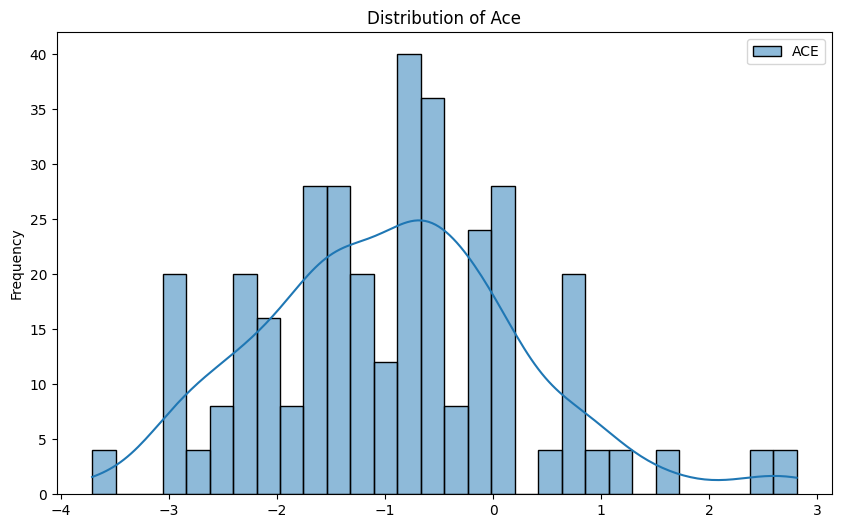

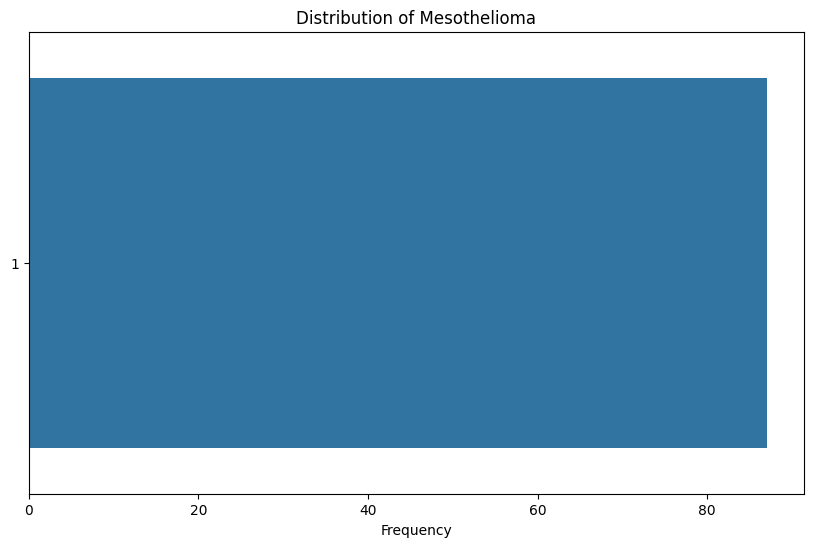

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'thca' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])


In [11]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,hypertension,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,mesothelioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3H-AB3K-01,0,0.160908,-3.157426,-0.531035,0.483128,-0.152778,0.65969,0.001606,0.095754,-0.423399,...,-0.900217,0.803567,-1.28139,-0.551677,2.729314,-2.035927,0.175405,0.164067,0.896588,1
TCGA-3H-AB3L-01,0,0.200408,-4.117426,-0.531035,0.786128,-0.033878,0.10959,-0.456594,-0.717246,-0.423399,...,-1.074117,0.139267,-0.39069,0.113323,2.440714,0.166873,0.070905,0.942767,1.119988,1
TCGA-3H-AB3M-01,0,-1.009592,-2.663326,-0.068835,0.828928,-0.737678,0.77649,-0.002594,-0.552846,0.388301,...,-1.124917,0.242467,-0.46969,0.307823,2.412214,-1.703127,-0.213695,1.932667,0.740488,1
TCGA-3H-AB3O-01,0,-0.147492,-2.266526,-0.531035,0.274528,-0.311878,0.31179,-1.012494,2.159654,0.149201,...,0.384783,3.061667,-1.28139,-0.580077,1.625214,0.947073,1.408105,2.816367,0.836088,1
TCGA-3H-AB3S-01,0,0.282008,-2.042126,-0.531035,0.825228,-0.210878,0.07039,-0.070994,0.310754,-0.423399,...,-1.587117,-0.441533,-1.28139,0.417023,2.804214,-0.154627,-0.004295,-0.111033,0.586488,1


Do regression & Cross Validation

In [12]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [13]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
<ipython-input-12-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


The cross-validation accuracy is 48.24% ± 13.62%


In [14]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


In [15]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-12-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


Discussion

In [16]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")


Effect of the condition on the target variable:
Variable: hypertension
Coefficient: 0.0000
p-value: 1



In [17]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

流式输出内容被截断，只能显示最后 5000 行内容。
       GLIPR1L2  1.918509e-31       4.178759e-15
         OR13C9 -2.081885e-31       4.186830e-15
      LOC153910  1.740868e-31       4.191370e-15
          SGSM1  1.362142e-31       4.194315e-15
        C1orf26  1.671312e-31       4.200108e-15
           RFX3  7.903222e-31       4.201859e-15
          SNED1 -1.830288e-31       4.205351e-15
        C9orf30  2.027184e-31       4.205351e-15
          STAP2  2.558362e-31       4.206534e-15
          NCOA2 -8.107210e-31       4.206534e-15
       C1orf174  1.115218e-30       4.211355e-15
          CSMD1  2.058130e-31       4.216459e-15
       C14orf48  1.033631e-31       4.219282e-15
           NAPA -7.651597e-32       4.220082e-15
          NACA2 -3.296914e-31       4.221126e-15
         GPR157  1.456775e-31       4.225182e-15
         VSTM2A -1.666700e-31       4.236243e-15
          ZNF23 -1.687564e-31       4.243838e-15
          LIN37  4.084934e-31       4.246674e-15
          MASP2  4.119588e-31       4.2478